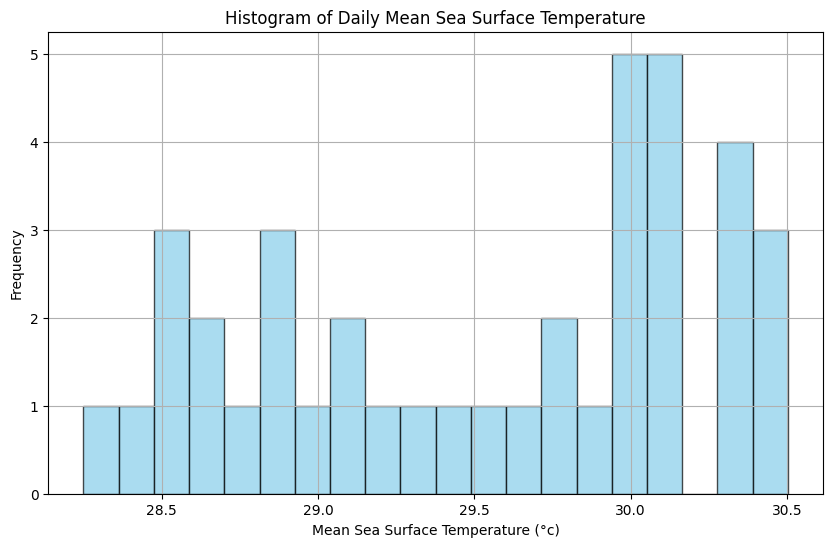

In [18]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def extract_sst_from_tif(tif_file):
    with rasterio.open(tif_file) as src:
        sst_data = src.read(1)  # Assuming SST data is in the first band (band index 1)
        return sst_data

tif_folder = "/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/Jul23_088706_SST"
tif_files = [os.path.join(tif_folder, file) for file in os.listdir(tif_folder) if file.endswith('.tif')]

# Load the first TIF image to get the reference shape
reference_tif = tif_files[0]
with rasterio.open(reference_tif) as src:
    reference_shape = src.shape

# Load and resize all TIF images to the reference shape
sst_data_list = []
for tif_file in tif_files:
    with rasterio.open(tif_file) as src:
        sst_data = src.read(1)
        if src.shape != reference_shape:
            sst_data = np.array(src.read(1))
            sst_data = np.resize(sst_data, reference_shape)
        sst_data_list.append(sst_data)

# Stack all the SST data along the time axis
sst_data_stack = np.stack(sst_data_list, axis=0)

# Convert Kelvin to Celsius and handle NaN values
sst_data_stack[sst_data_stack == -999] = np.nan
valid_sst_data = sst_data_stack -273.15

# Calculate the daily mean SST for each day
daily_mean_sst = np.nanmean(valid_sst_data, axis=(1, 2))

# Create a histogram to compare the variation in daily mean SST
plt.figure(figsize=(10, 6))
plt.hist(daily_mean_sst, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Mean Sea Surface Temperature (°c)')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Mean Sea Surface Temperature')
plt.grid(True)

# Save the plot as a PDF
output_path = "/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/Final_histogram_Celcius_plot.pdf"  # Replace "/path/to/output/" with the desired output directory
plt.savefig(output_path)

plt.show()



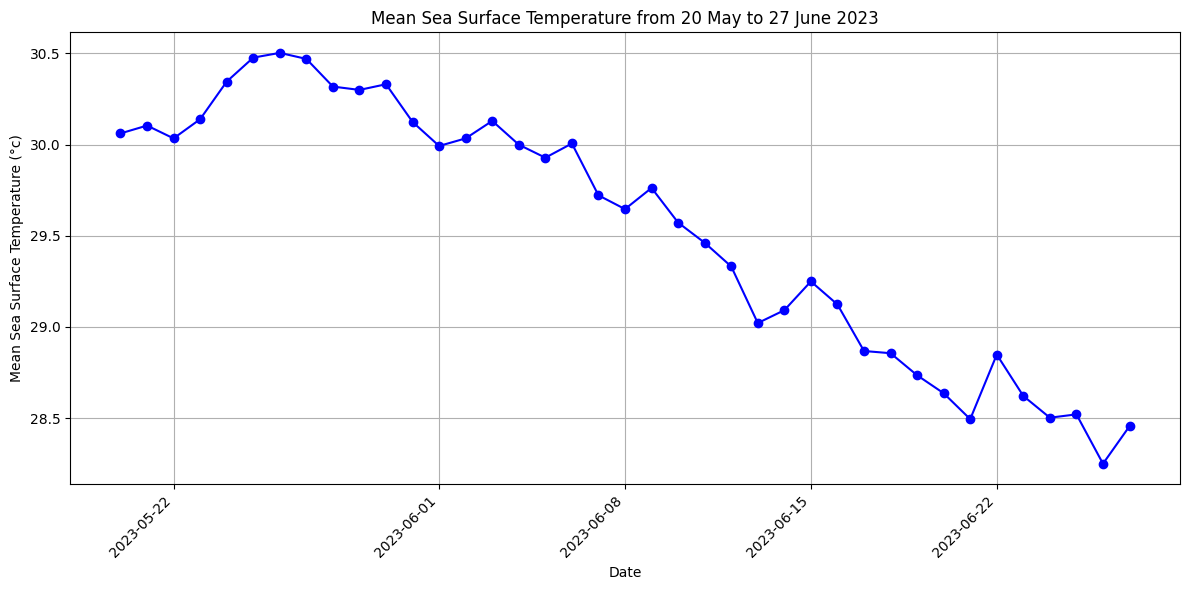

In [19]:
import os
import re
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def extract_date_from_filename(filename):
    date_str = re.search(r'\d{2}[A-Z]{3}\d{4}', filename).group(0)
    date = datetime.strptime(date_str, '%d%b%Y')
    return date

def extract_sst_from_tif(tif_file):
    with rasterio.open(tif_file) as src:
        sst_data = src.read(1)  # Assuming SST data is in the first band (band index 1)
        return sst_data

tif_folder = "/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/Jul23_088706_SST"
tif_files = [os.path.join(tif_folder, file) for file in os.listdir(tif_folder) if file.endswith('.tif')]

# Extract dates and SST data from each file
date_sst_data = []
for tif_file in tif_files:
    date = extract_date_from_filename(os.path.basename(tif_file))
    sst_data = extract_sst_from_tif(tif_file)
    date_sst_data.append((date, sst_data))

# Sort the data based on date
date_sst_data.sort(key=lambda x: x[0])

# Load the first TIF image to get the reference shape
reference_tif = tif_files[0]
with rasterio.open(reference_tif) as src:
    reference_shape = src.shape

# Load and resize all TIF images to the reference shape
sst_data_list = []
date_list = []
for date, sst_data in date_sst_data:
    if sst_data.shape != reference_shape:
        sst_data = np.array(sst_data)
        sst_data = np.resize(sst_data, reference_shape)
    sst_data_list.append(sst_data)
    date_list.append(date)

# Stack all the SST data along the time axis
sst_data_stack = np.stack(sst_data_list, axis=0)

# Convert Kelvin to Celsius and handle NaN values
sst_data_stack[sst_data_stack == -999] = np.nan
valid_sst_data = sst_data_stack-273.15

# Calculate the mean SST value at each time step
mean_sst_data = np.nanmean(valid_sst_data, axis=(1, 2))

# Generate date range from 20 May 2023 to 27 June 2023
start_date = datetime(2023, 5, 20)
dates = [start_date + timedelta(days=i) for i in range(len(mean_sst_data))]

# Plot the graph
plt.figure(figsize=(12, 6))
plt.plot(dates, mean_sst_data, marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Mean Sea Surface Temperature (°c)')
plt.title('Mean Sea Surface Temperature from 20 May to 27 June 2023')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Save the plot as a PDF file
output_file = "/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/Final_mean_sst_Celcius_plot.pdf"
plt.savefig(output_file, format='pdf')

# Show the plot
plt.show()



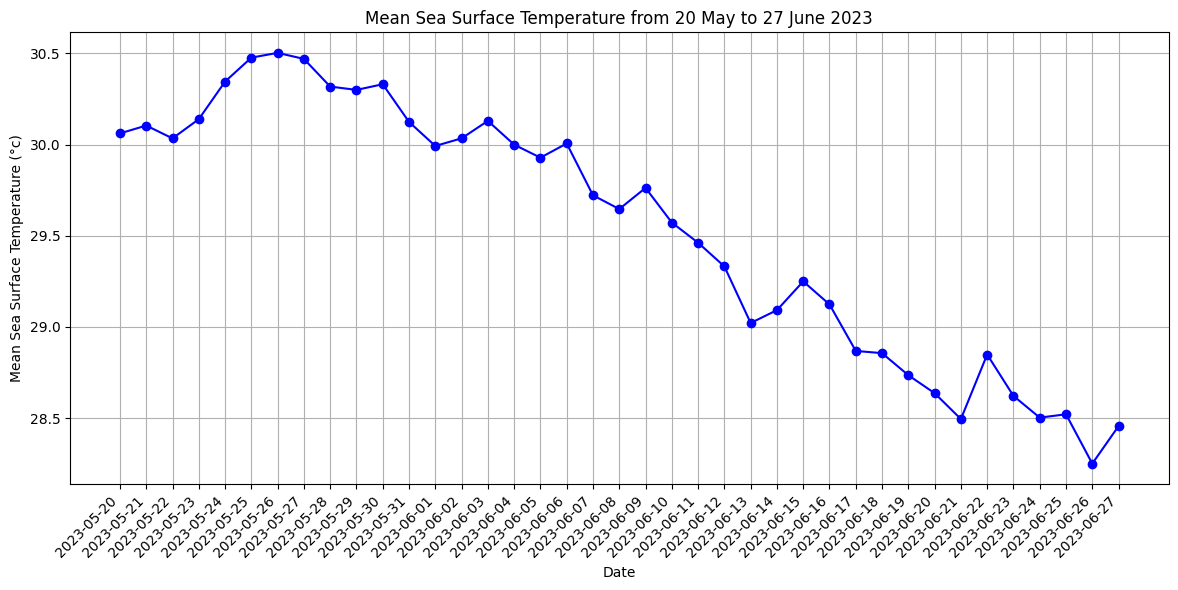

In [20]:
import os
import re
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from datetime import datetime, timedelta

def extract_date_from_filename(filename):
    date_str = re.search(r'\d{2}[A-Z]{3}\d{4}', filename).group(0)
    date = datetime.strptime(date_str, '%d%b%Y')
    return date

def extract_sst_from_tif(tif_file):
    with rasterio.open(tif_file) as src:
        sst_data = src.read(1)  # Assuming SST data is in the first band (band index 1)
        return sst_data

tif_folder = "/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/Jul23_088706_SST"
tif_files = [os.path.join(tif_folder, file) for file in os.listdir(tif_folder) if file.endswith('.tif')]

# Extract dates and SST data from each file
date_sst_data = []
for tif_file in tif_files:
    date = extract_date_from_filename(os.path.basename(tif_file))
    sst_data = extract_sst_from_tif(tif_file)
    date_sst_data.append((date, sst_data))

# Sort the data based on date
date_sst_data.sort(key=lambda x: x[0])

# Load the first TIF image to get the reference shape
reference_tif = tif_files[0]
with rasterio.open(reference_tif) as src:
    reference_shape = src.shape

# Load and resize all TIF images to the reference shape
sst_data_list = []
date_list = []
for date, sst_data in date_sst_data:
    if sst_data.shape != reference_shape:
        sst_data = np.array(sst_data)
        sst_data = np.resize(sst_data, reference_shape)
    sst_data_list.append(sst_data)
    date_list.append(date)

# Stack all the SST data along the time axis
sst_data_stack = np.stack(sst_data_list, axis=0)

# Convert Kelvin to Celsius and handle NaN values
sst_data_stack[sst_data_stack == -999] = np.nan
valid_sst_data = sst_data_stack - 273.15

# Calculate the mean SST value at each time step
mean_sst_data = np.nanmean(valid_sst_data, axis=(1, 2))

# Generate date range from 20 May 2023 to 27 June 2023
start_date = datetime(2023, 5, 20)
dates = [start_date + timedelta(days=i) for i in range(len(mean_sst_data))]

# Plot initialization
fig, ax = plt.subplots(figsize=(12, 6))
line, = ax.plot([], [], marker='o', linestyle='-', color='b')
ax.set_xlabel('Date')
ax.set_ylabel('Mean Sea Surface Temperature (°c)')
ax.set_title('Mean Sea Surface Temperature from 20 May to 27 June 2023')
ax.set_xticks(dates)
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in dates], rotation=45, ha='right')
ax.grid(True)
plt.tight_layout()
# Animation update function
def update(frame):
    line.set_data(dates[:frame+1], mean_sst_data[:frame+1])
    ax.relim()
    ax.autoscale_view()
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(dates), interval=500, blit=True)

# Save the animation as a GIF
output_file = "/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/Final_mean_sst_Celcius_animation.gif"
ani.save(output_file, writer='pillow')

# Show the plot (optional)
plt.show()



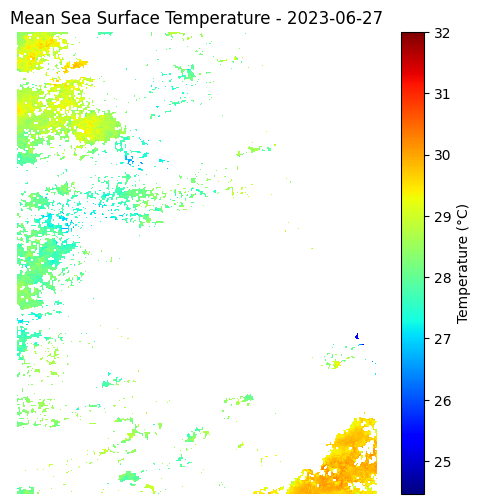

In [27]:
import os
import re
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from datetime import datetime, timedelta

def extract_date_from_filename(filename):
    date_str = re.search(r'\d{2}[A-Z]{3}\d{4}', filename).group(0)
    date = datetime.strptime(date_str, '%d%b%Y')
    return date

def extract_sst_from_tif(tif_file):
    with rasterio.open(tif_file) as src:
        sst_data = src.read(1)  # Assuming SST data is in the first band (band index 1)
        return sst_data

tif_folder = "/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/Jul23_088706_SST"
tif_files = [os.path.join(tif_folder, file) for file in os.listdir(tif_folder) if file.endswith('.tif')]

# Extract dates and SST data from each file
date_sst_data = []
for tif_file in tif_files:
    date = extract_date_from_filename(os.path.basename(tif_file))
    sst_data = extract_sst_from_tif(tif_file)
    date_sst_data.append((date, sst_data))

# Sort the data based on date
date_sst_data.sort(key=lambda x: x[0])

# Load the first TIF image to get the reference shape
reference_tif = tif_files[0]
with rasterio.open(reference_tif) as src:
    reference_shape = src.shape


# Load, resize, and stack all TIF images to the reference shape
sst_data_list = []
date_list = []
for date, sst_data in date_sst_data:
    if sst_data.shape != reference_shape:
        sst_data = np.array(sst_data)
        sst_data = np.resize(sst_data, reference_shape)
    sst_data[sst_data == -999] = np.nan  # Set "no data" values to NaN
    sst_data_list.append(sst_data)
    date_list.append(date)

# Stack all the SST data along the time axis
sst_data_stack = np.stack(sst_data_list, axis=0)

# Convert Kelvin to Celsius
sst_data_stack -= 273.15

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 6))

# Initialize the image plot with the first SST data
im = ax.imshow(sst_data_stack[0], cmap='jet', vmin=np.nanmin(sst_data_stack), vmax=np.nanmax(sst_data_stack))
ax.set_title('Mean Sea Surface Temperature - ' + date_list[0].strftime('%Y-%m-%d'))
ax.axis('off')

# Add a colorbar for the temperature scale
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Temperature (°C)')

# Animation update function
def update(frame):
    im.set_array(sst_data_stack[frame])
    ax.set_title('Mean Sea Surface Temperature - ' + date_list[frame].strftime('%Y-%m-%d'))

    return im,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(sst_data_list), interval=500, blit=True)

# Save the animation as a GIF
output_file = "/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/animation.gif"
ani.save(output_file, writer='pillow')

# Show the plot (optional)
plt.show()

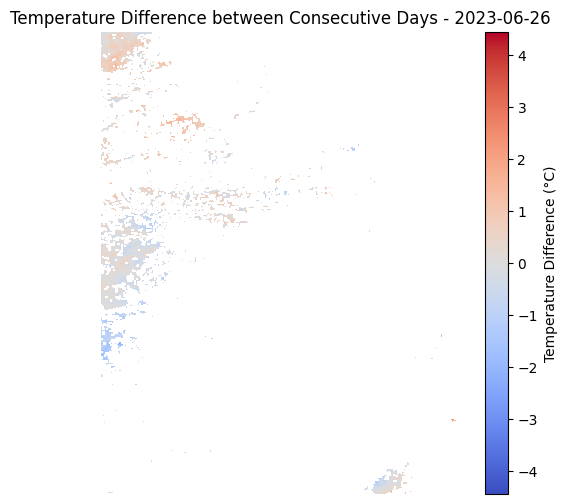

In [3]:
import os
import re
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from datetime import datetime, timedelta

def extract_date_from_filename(filename):
    date_str = re.search(r'\d{2}[A-Z]{3}\d{4}', filename).group(0)
    date = datetime.strptime(date_str, '%d%b%Y')
    return date

def extract_sst_from_tif(tif_file):
    with rasterio.open(tif_file) as src:
        sst_data = src.read(1)  # Assuming SST data is in the first band (band index 1)
        return sst_data

tif_folder = "/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/Jul23_088706_SST"
tif_files = [os.path.join(tif_folder, file) for file in os.listdir(tif_folder) if file.endswith('.tif')]

# Extract dates and SST data from each file
date_sst_data = []
for tif_file in tif_files:
    date = extract_date_from_filename(os.path.basename(tif_file))
    sst_data = extract_sst_from_tif(tif_file)
    date_sst_data.append((date, sst_data))

# Sort the data based on date
date_sst_data.sort(key=lambda x: x[0])

# Load the first TIF image to get the reference shape
reference_tif = tif_files[0]
with rasterio.open(reference_tif) as src:
    reference_shape = src.shape

# Load, resize, and stack all TIF images to the reference shape
sst_data_list = []
date_list = []
for date, sst_data in date_sst_data:
    if sst_data.shape != reference_shape:
        sst_data = np.array(sst_data)
        sst_data = np.resize(sst_data, reference_shape)
    sst_data[sst_data == -999] = np.nan  # Set "no data" values to NaN
    sst_data_list.append(sst_data)
    date_list.append(date)

# Stack all the SST data along the time axis
sst_data_stack = np.stack(sst_data_list, axis=0)

# Convert Kelvin to Celsius
sst_data_stack -= 273.15

# Calculate the temperature difference between consecutive days
temperature_diff_stack = np.diff(sst_data_stack, axis=0)

# Find the maximum absolute temperature difference to set symmetric colorbar limits
max_diff = np.nanmax(np.abs(temperature_diff_stack))

# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(8, 6))

# Initialize the image plot with the first temperature difference data
im = ax.imshow(temperature_diff_stack[0], cmap='coolwarm', vmin=-max_diff, vmax=max_diff)
ax.set_title('Temperature Difference between Consecutive Days - ' + date_list[0].strftime('%Y-%m-%d'))
ax.axis('off')

# Add a colorbar for the temperature difference scale
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Temperature Difference (°C)')

# Animation update function
def update(frame):
    im.set_array(temperature_diff_stack[frame])
    ax.set_title('Temperature Difference between Consecutive Days - ' + date_list[frame].strftime('%Y-%m-%d'))

    return im,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(sst_data_list)-1, interval=500, blit=True)

# Save the animation as a GIF
output_file = "/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/Difference_animation.gif"
ani.save(output_file, writer='pillow')

# Show the plot (optional)
plt.show()


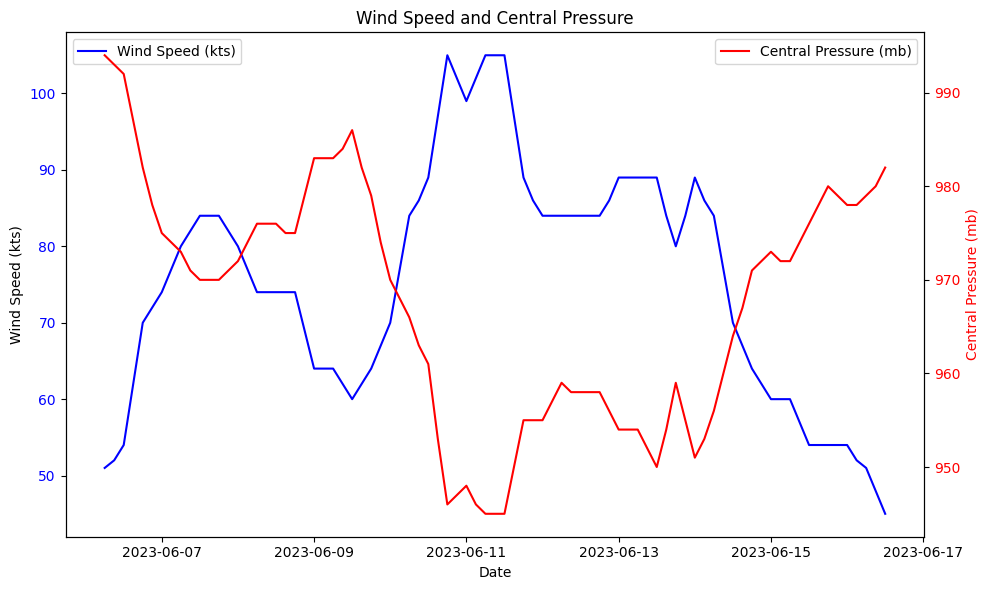

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.xlsx' with the actual path to your xlsx file
xlsx_file = '/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/wind intencity.xlsx'

# Read the data from the xlsx file
df = pd.read_excel(xlsx_file, parse_dates=['Time'], engine='openpyxl')

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot wind speed on the first axis
ax1.plot(df['Time'], df['Wind speed'], color='b', label='Wind Speed (kts)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Wind Speed (kts)')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create a twin axis for central pressure
ax2 = ax1.twinx()
ax2.plot(df['Time'], df['Central  Pressure'], color='r', label='Central Pressure (mb)')
ax2.set_ylabel('Central Pressure (mb)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

# Format the date tick labels
plt.xticks(rotation=45)

# Add a title
plt.title('Wind Speed and Central Pressure')

# Save the plot as a PDF file
output_file = "/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/Intensity_plot.pdf"
plt.savefig(output_file)

# Show the plot
plt.tight_layout()
plt.show()



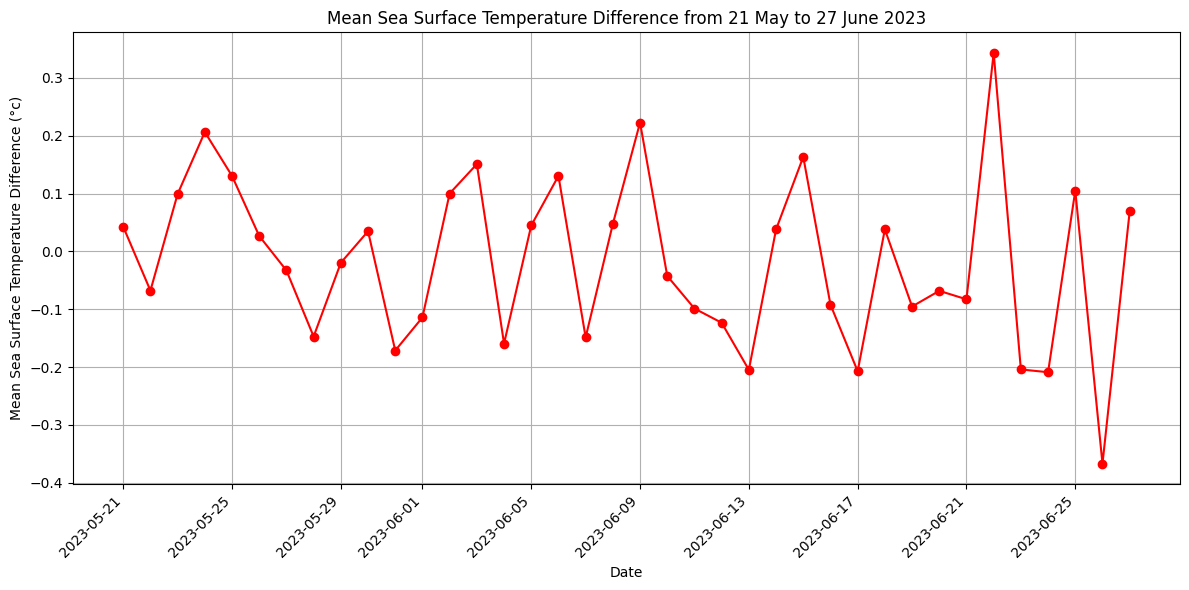

In [1]:
import os
import re
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def extract_date_from_filename(filename):
    date_str = re.search(r'\d{2}[A-Z]{3}\d{4}', filename).group(0)
    date = datetime.strptime(date_str, '%d%b%Y')
    return date

def extract_sst_from_tif(tif_file):
    with rasterio.open(tif_file) as src:
        sst_data = src.read(1)  # Assuming SST data is in the first band (band index 1)
        return sst_data

tif_folder = "/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/Jul23_088706_SST"
tif_files = [os.path.join(tif_folder, file) for file in os.listdir(tif_folder) if file.endswith('.tif')]

# Extract dates and SST data from each file
date_sst_data = []
for tif_file in tif_files:
    date = extract_date_from_filename(os.path.basename(tif_file))
    sst_data = extract_sst_from_tif(tif_file)
    date_sst_data.append((date, sst_data))

# Sort the data based on date
date_sst_data.sort(key=lambda x: x[0])

# Load the first TIF image to get the reference shape
reference_tif = tif_files[0]
with rasterio.open(reference_tif) as src:
    reference_shape = src.shape

# Load and resize all TIF images to the reference shape
sst_data_list = []
date_list = []
for date, sst_data in date_sst_data:
    if sst_data.shape != reference_shape:
        sst_data = np.array(sst_data)
        sst_data = np.resize(sst_data, reference_shape)
    sst_data_list.append(sst_data)
    date_list.append(date)

# Stack all the SST data along the time axis
sst_data_stack = np.stack(sst_data_list, axis=0)

# Convert Kelvin to Celsius and handle NaN values
sst_data_stack[sst_data_stack == -999] = np.nan
valid_sst_data = sst_data_stack-273.15

# Calculate the difference between consecutive SST data
sst_data_diff = np.diff(valid_sst_data, axis=0)

# Calculate the mean SST difference at each time step
mean_sst_diff = np.nanmean(sst_data_diff, axis=(1, 2))

# Generate date range for the differences from 21 May 2023 to 27 June 2023
start_date_diff = datetime(2023, 5, 21)
dates_diff = [start_date_diff + timedelta(days=i) for i in range(len(mean_sst_diff))]

# Plot the graph for SST differences
plt.figure(figsize=(12, 6))
plt.plot(dates_diff, mean_sst_diff, marker='o', linestyle='-', color='r')
plt.xlabel('Date')
plt.ylabel('Mean Sea Surface Temperature Difference (°c)')
plt.title('Mean Sea Surface Temperature Difference from 21 May to 27 June 2023')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Save the plot for SST differences as a PDF file
output_file_diff = "/home/jovyan/Desktop/shivanshi thesis/Tushar/Rohitha/Final_mean_sst_difference_plot.pdf"
plt.savefig(output_file_diff, format='pdf')

# Show the plot for SST differences
plt.show()